<a href="https://colab.research.google.com/github/rohimatun/2025-Pengolahan-Citra-TI2B/blob/main/Jobsheet_01_Rohimatun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet Minggu 01 - Dasar Berkas Gambar

## P1. Mendefinisikan Istilah Bit, Byte, Kilobyte, Megabyte pada Citra

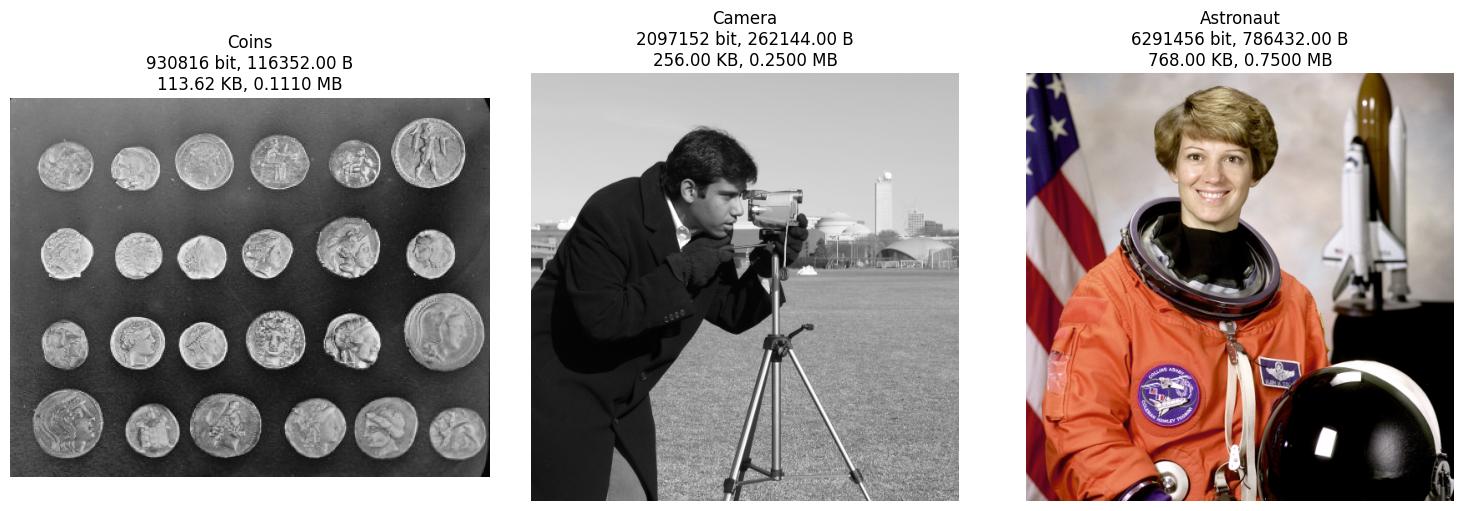

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Contoh gambar dari scikit-image
gambar_coins = data.coins()
gambar_camera = data.camera()
gambar_astronaut = data.astronaut()

# Fungsi untuk menghitung ukuran gambar dalam bit, byte, KB, MB
def hitung_ukuran(image):
  bit_per_pixel = 8 if len(image.shape) == 2 else 24 # Grayscale = 8 bit, RGB = 24 bit
  total_pixel = image.shape[0] * image.shape[1]
  total_bits = total_pixel * bit_per_pixel
  total_bytes = total_bits / 8
  total_kb = total_bytes / 1024
  total_mb = total_kb / 1024
  return total_bits, total_bytes, total_kb, total_mb

# Menyusun gambar dan ukurannya dalam satu baris
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Daftar gambar dan nama
gambar_list = [gambar_coins, gambar_camera, gambar_astronaut]
nama_list = ["Coins", "Camera", "Astronaut"]

for ax, img, nama in zip(axes, gambar_list, nama_list):
  bits, bytes_, kb, mb = hitung_ukuran(img)
  ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
  ax.set_title(f"{nama}\n{bits} bit, {bytes_:.2f} B\n{kb:.2f} KB, {mb:.4f} MB")
  ax.axis('off')

plt.tight_layout()
plt.show()


## P2. Citra Digital Tersusun dari Beberapa Pixel

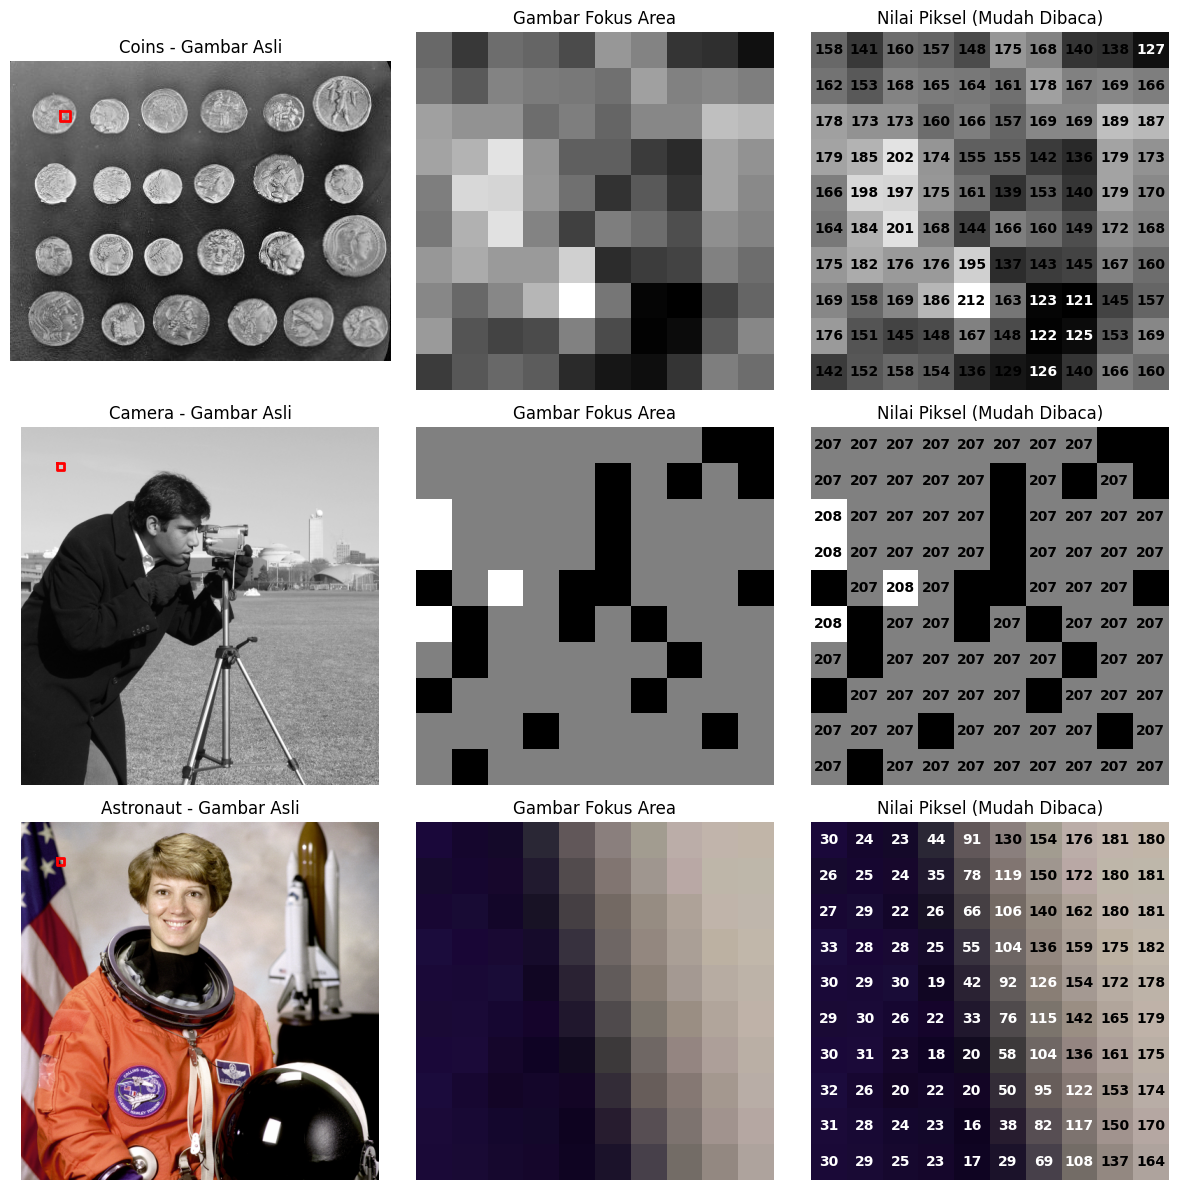

In [5]:
# Menampilkan bagaimana citra digital tersusun dari piksel dengan area fokus yang ditandai
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# List gambar dan nama
gambar_list = [gambar_coins, gambar_camera, gambar_astronaut]
nama_list = ["Coins", "Camera", "Astronaut"]

# Koordinat area kecil yang di-zoom
x_start, x_end = 50, 60
y_start, y_end = 50, 60

for i, (img, nama) in enumerate(zip(gambar_list, nama_list)):
  # Gambar asli
  axes[i, 0].imshow(img, cmap='gray' if len(img.shape) == 2 else None)
  axes[i, 0].set_title(f"{nama} - Gambar Asli")
  axes[i, 0].axis('off')

  # Tambahan kotak merah untuk menunjukkan area yang difokuskan
  rect_x = [x_start, x_end, x_end, x_start, x_start]
  rect_y = [y_start, y_start, y_end, y_end, y_start]
  axes[i, 0].plot(rect_x, rect_y, color="red", linewidth=2)

  # Gambar fokus area
  zoomed_img = img[y_start:y_end, x_start:x_end]
  axes[i, 1].imshow(zoomed_img, cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')
  axes[i, 1].set_title("Gambar Fokus Area")
  axes[i, 1]. axis('off')

  #Menampilkan nilai piksel dalam area yang di-zoom (khusus RGB, gunakan rata-rata kanal)
  axes[i, 2].imshow(zoomed_img, cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')

  for y in range(zoomed_img.shape[0]):
    for x in range(zoomed_img.shape[1]):
      if len(img.shape) == 3:   # Jika RGB, ambil ilai rata-rata piksel untuk tampilan angka
        pixel_value = np.mean(zoomed_img[y, x]).astype(int)
      else:
        pixel_value = zoomed_img[y, x]

      # Pilih warna teks agar mudah dibaca di latar belakang
      text_color = "white" if pixel_value < 128 else "black"
      axes[i, 2].text(x, y, str(pixel_value), color=text_color, ha='center', va='center', fontsize=10, fontweight='bold')

  axes[i, 2].set_title("Nilai Piksel (Mudah Dibaca)")
  axes[i, 2].axis('off')

plt.tight_layout()
plt.show()


## P3. Citra Disimpan dalam Array


=== Coins ===
Tipe Data: <class 'numpy.ndarray'>
Dimensi: uint8
contoh nilai piksel (5x5 pertama):
[[ 47 123 133 129 137]
 [ 93 144 145 143 145]
 [126 147 143 147 145]
 [131 136 133 139 136]
 [131 133 134 135 129]]

=== Camera ===
Tipe Data: <class 'numpy.ndarray'>
Dimensi: uint8
contoh nilai piksel (5x5 pertama):
[[200 200 200 200 199]
 [200 199 199 200 199]
 [199 199 199 200 200]
 [200 200 199 199 199]
 [200 200 200 200 199]]

=== Astronaut ===
Tipe Data: <class 'numpy.ndarray'>
Dimensi: uint8
contoh nilai piksel (5x5 pertama):
[[[154 147 151]
  [109 103 124]
  [ 63  58 102]
  [ 54  51  98]
  [ 76  76 106]]

 [[177 171 171]
  [144 141 143]
  [113 114 124]
  [106 107 120]
  [128 128 131]]

 [[201 194 193]
  [182 178 175]
  [168 165 164]
  [159 157 157]
  [167 165 161]]

 [[220 213 210]
  [214 206 206]
  [202 198 196]
  [197 191 193]
  [200 194 196]]

 [[232 223 223]
  [226 220 215]
  [221 215 210]
  [215 210 206]
  [221 211 213]]]


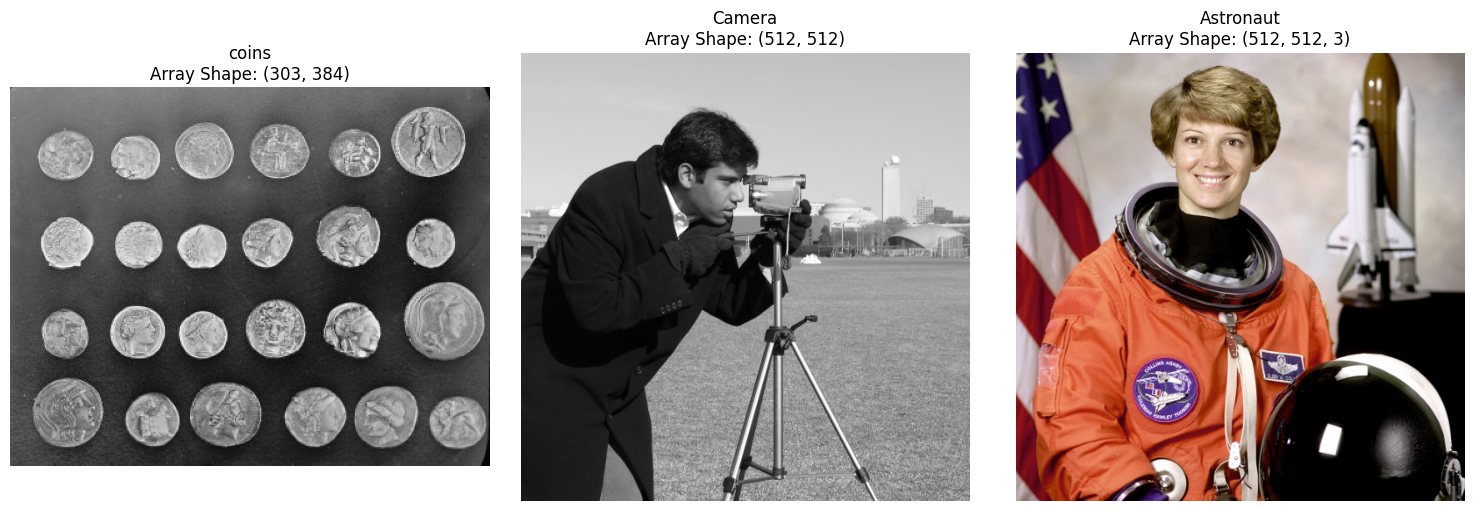

In [6]:
# Menjelaskan bagaimana citra disimpan dalam array NumPy

import numpy as np

# Memuat gambar dari scikit-image
gambar_coins = data.coins()
gambar_camera = data.camera()
gambar_astronaut = data.astronaut()

# Fungsi untuk menampilkan informasi array NumPy dari gambar
def info_array_numpy(image, nama):
  print(f"\n=== {nama} ===")
  print(f"Tipe Data: {type(image)}")  # Harusnya <class 'numpy.ndarray'>
  print(f"Dimensi: {image.dtype}")    # Menampilkan tipe data dalam array (uint8)

  # Menampilkan sebagian kecil dari array (5x5 piksel pertama)
  print("contoh nilai piksel (5x5 pertama):")
  print(image[:5, :5] if len(image.shape) == 2 else image[:5, :5, :])

# Menampilkan informasi setiap gambar
info_array_numpy(gambar_coins, "Coins")
info_array_numpy(gambar_camera, "Camera")
info_array_numpy(gambar_astronaut, "Astronaut")

# Visualisasi bagaimana array NumPy mewakii citra
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

gambar_list = [gambar_coins, gambar_camera, gambar_astronaut]
nama_list = ["coins", "Camera", "Astronaut"]

for ax, img, nama in zip(axes, gambar_list, nama_list):
  ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
  ax.set_title(f"{nama}\nArray Shape: {img.shape}")
  ax.axis('off')

plt.tight_layout()
plt.show()

## P4. Sistem Koordinar Kiri Atas dalam Citra Digital

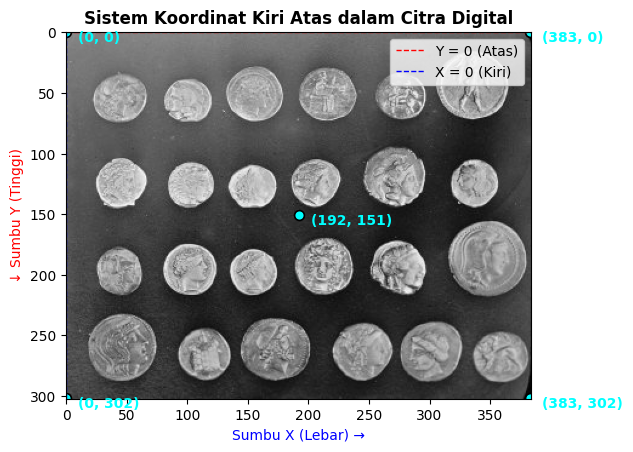

In [7]:
# Menjelaskan sistem koordinat kiri atas dalam citra digital dengan warna anatosi yang lebih kontras

# Pilih salah satu gambar untuk contoh koordinat
gambar_sample = data.coins()

# Ukuran gambar
height, width = gambar_sample.shape

# Buat plot
fig, ax = plt.subplots(figsize=(6, 6))

# Tampilkan gambar
ax.imshow(gambar_sample, cmap='gray')

# Tambahkan anotasi sumbu koordinat
ax.set_title("Sistem Koordinat Kiri Atas dalam Citra Digital", fontsize=12, fontweight='bold')
ax.set_xlabel("Sumbu X (Lebar) →", fontsize=10, color="blue")
ax.set_ylabel("↓ Sumbu Y (Tinggi)", fontsize=10, color="red")

# Tambahkan garis koordinat utama
ax.axhline(y=0, color='red', linestyle='--', linewidth=1, label="Y = 0 (Atas)")
ax.axvline(x=0, color='blue', linestyle='--', linewidth=1, label="X = 0 (Kiri)")

# Tambahkan beberapa titik koordinat penting dengan warna kontras (cyan)
koordinat_titik = [ (0,0), (width-1, 0), (0, height-1), (width-1, height-1), ((width//2, height//2))]
for x, y in koordinat_titik:
  ax.scatter(x, y, color='cyan', s=50, edgecolors='black', linewidth=1.2)   # Titik dengan outline hitam
  ax.text(x + 10, y + 10, f"({x}, {y})", color="cyan", fontsize=10, fontweight="bold", ha="left", va="bottom")

# Tambahkan legenda
ax.legend(loc="upper right")
plt.show()